# PD Model
### Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Sets the pandas dataframe options to display all columns
pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## 1. Loading the Data and Selecting the Features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [3]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [4]:
loan_data_inputs_train.tail()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,term_int,emp_length_int,issue_d_string,mths_since_issue_d,earliest_cr_line_string,earliest_cr_line_date_day,mths_since_earliest_cr_line,last_pymnt_d_string,last_credit_pull_d_string,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,home_ownership: RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub

In [5]:
#make sure train/test data have the same dimensions
print('loan_data_inputs_train size is: ', loan_data_inputs_train.shape,
      '\nloan_data_targets_train size is: ', loan_data_targets_train.shape,
      '\nloan_data_inputs_test size is: ', loan_data_inputs_test.shape,
      '\nloan_data_targets_test size is: ', loan_data_targets_test.shape)

loan_data_inputs_train size is:  (373028, 281) 
loan_data_targets_train size is:  (373028, 1) 
loan_data_inputs_test size is:  (93257, 281) 
loan_data_targets_test size is:  (93257, 1)


### Selecting the Features

In [9]:
#array containing all dummie variables
dummies = ['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
'home_ownership: RENT_OTHER_NONE_ANY','home_ownership:OWN','home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified','verification_status:Source Verified','verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f','initial_list_status:w',
'term:36','term:60',
'emp_length:0','emp_length:1','emp_length:2-4','emp_length:5-6','emp_length:7-9','emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548','int_rate:9.548-12.025','int_rate:12.025-15.74','int_rate:15.74-20.281','int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0','delinq_2yrs:1-3','delinq_2yrs:>=4',
'inq_last_6mths:0','inq_last_6mths:1-2','inq_last_6mths:3-6','inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2','pub_rec:3-4','pub_rec:>=5',
'total_acc:<=27','total_acc:28-51','total_acc:>=52',
'acc_now_delinq:0','acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:0-2',           
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=87',
]

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership: RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:<38',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:>=57',
'mths_since_last_record:>=87']

In [11]:
# Here we select all dummie variables to form a new dataframe.
inputs_train_with_ref = loan_data_inputs_train.loc[:,dummies]
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories.、
inputs_train = inputs_train_with_ref.drop(ref_categories, axis = 1) 

# 2. PD Model Estimation

## Logistic Regression

We fit training data (*inputs_train(X1,X2 etc), loan_data_targets_train(Y)* using logistic regresstion.

$ \frac{P(Y=1)}{P(Y=0)} = \exp{(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 ....)} $

The result coefficients ($\beta$) are summarised in a Table.

In [17]:
# We create an instance of an object from the 'LogisticRegression' class.
reg = LogisticRegression(max_iter = 200, solver = 'saga')

# Estimates the coefficients of the object from the 'LogisticRegression' class
reg.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200, solver='saga')

In [18]:
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.intercept_

array([-3.19811078])

In [19]:
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.coef_

array([[ 1.05233783e+00,  7.19652079e-01,  5.34185133e-01,
         3.87214696e-01,  2.24196370e-01,  8.41243274e-02,
         9.09782354e-02,  1.81118411e-01,  8.74961008e-02,
         6.64171872e-02,  5.63011091e-02,  1.73902180e-01,
         1.11604358e-01,  1.00954644e-01,  7.80818569e-02,
         2.16166708e-01,  2.15827900e-01,  2.51338188e-01,
         2.36224336e-01,  3.25615589e-01,  5.24526975e-01,
         6.94221926e-02,  9.39463903e-04,  2.11797086e-01,
         1.67232131e-01,  1.68468186e-01,  2.22480023e-01,
         2.90306580e-02,  2.63613404e-01,  1.72881175e-01,
         1.96491362e-01,  1.61399742e-01,  1.19038790e-01,
         1.78236641e-01, -1.17137215e-01, -1.09979151e-01,
        -1.00830382e-01, -4.01793462e-02, -2.85118922e-02,
         4.60074257e-01,  1.10699618e+00,  7.54494214e-01,
         5.09137991e-01,  2.68501650e-01,  7.02694808e-02,
         9.57187977e-02,  1.02338813e-01,  1.27364950e-01,
         1.52075005e-01,  9.94494351e-02,  1.40217133e-0

In [20]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values

In [21]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-3.198111
1,grade:A,1.052338
2,grade:B,0.719652
3,grade:C,0.534185
4,grade:D,0.387215
...,...,...
98,mths_since_last_record:0-2,0.000000
99,mths_since_last_record:3-20,0.000000
100,mths_since_last_record:21-31,0.524861
101,mths_since_last_record:32-80,0.451497


For example, for the grades dummie variables, we used **grade:G** as the reference state.

Hence we can calculate the chance of a **grade:D** customer to not-default as compared to a **grade:G** customer. In the Table above we see the $\beta$ coefficient for  **grade:D**  is 0.5012.

$\frac{odds(Y=1 | grade =D)}{odds(Y=1 | grade =G)} = e^{0.5012} = 1.65 $

That is, the chance for a **grade:D** customer to re-pay his loan is 1.65 times higher than a **grade:G** customer.

In [22]:
#save summary table
summary_table.to_csv('summary_table.csv')

# 3. PD Model Validation
Apply the model to test data, predict the probabilities of bowrrowers being good (y_hat_test_proba) and the Y label (good or bad, 1/0).

The results are summarised in a table


In [23]:
#prepare test dataset same as before
inputs_test_with_ref = loan_data_inputs_test.loc[:,dummies]
inputs_test = inputs_test_with_ref.drop(ref_categories, axis = 1)

In [24]:
#preditct the **probabilities** (a fraction) of being a good borrower
y_hat_test_proba = reg.predict_proba(inputs_test)
#keep only the 'second' column
y_hat_test_proba = y_hat_test_proba[:,1]
#predict the results  (this would be either 0 or 1)
y_hat_test = reg.predict(inputs_test)

#create a new DF to be the same as loan_data_targets_test
loan_data_targets_test_temp = loan_data_targets_test
#reset index
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

#combine the DFs
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba),pd.DataFrame(y_hat_test)],axis = 1)

#rename columns
df_actual_predicted_probs.columns = ['loan_data_target_test', 'y_hat_testProba','y_hat_test']
df_actual_predicted_probs.head()

,loan_data_target_test,y_hat_testProba,y_hat_test
0,1,0.952787,1
1,1,0.886497,1
2,1,0.743638,1
3,1,0.949931,1
4,1,0.924084,1


In [25]:
#reset the index to be the same as loan_data_inputs_test
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.tail()
#save dataframe
df_actual_predicted_probs.to_csv('test_predicted_proba.csv')

# 4. Model Accuracy
## Confusion Matrix
We set Y = 1 when the **probability of non-default** (df_actual_predicted_probs['y_hat_testProba']) is greater than the cutoff threshold of choice (0.55 in this case) 

In [26]:
#set cut off  threshold
tr = 0.55
#caulcate default according to tr value
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_testProba']>tr,1,0)
pd.crosstab(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actural'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actural,,
0,0.009812,0.099456
1,0.009007,0.881725


tr = 0.55 gives a proportion of **false positive at 10%**, which is not acceptable (above)

When the threshold is increased to 0.9, then the proportion of false positive decreased to **3%**, with a cost of increased false negatve and decreased model accuracy. It did reduced risk but also **lost business**

In [27]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_testProba']>tr,1,0)
pd.crosstab(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actural'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actural,,
0,0.078493,0.030775
1,0.253225,0.637507


## ROC Curve
ROC (receiver operating chracteristic) curve shows the performance of a classification model at all classification thresholds. 
We recall:

True Positive Rate (TPR) : $TPR = \frac{TP}{TP+FN}$

False positive Rate (FPR): $FPR = \frac{FP}{FP+TN}$

ROC plots TPR vs.FPR at different classification thresholds (cr) . Lowering the classification thresholds classifies more items as positive, thus increase both FPR and TPR. 

In [28]:
#calculate roc_curve
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_testProba'])

In [29]:
#save dataframe for roc param
roc_data = {'fpr':fpr,'tpr':tpr,'thresholds':thresholds}
roc_df = pd.DataFrame(roc_data)
roc_df.to_csv('roc_data.csv')

Text(0.5, 1.0, 'ROC curve')

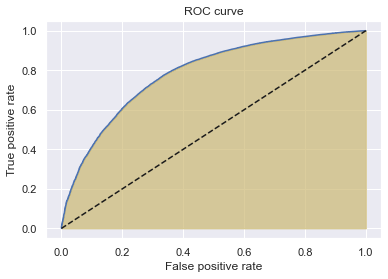

In [30]:
#plot ROC curve
sns.set()
plt.plot(fpr,tpr)
plt.fill_between(fpr, tpr, alpha = 0.7, color = 'y')

plt.plot(fpr,fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

## AOC (Area Under ROC)
The usual interpretation is as follows: 

|Interpretation | Area under the ROC curve|
| ------------- |:-------------:| 
|Bad |50%-60%|
|Poor | 60%-70% |
|Fair | 70%-80% |
|Good | 80%-90% |
|Excellent | 90%-100% |

Our model has an AOC at 78.7% which means the model is Fair, close to good

In [31]:
roc_auc_score(df_actual_predicted_probs['loan_data_target_test'], df_actual_predicted_probs['y_hat_testProba'])

0.7855235773177789

# 5. Evaluate Model Performance 
We use  Gini coefficient and kolmogorov-Smirnov coefficient

## Gini Coefficient
It meausres the statistical dispertion intended to represent the income inequality or the wealth inequality within a nation or a social group.

It defines as:
$Gini = 2 \times AUROC - 1 = 0.574$

In the project, it is used to inequality between non-defaulted (1) and defaulted borrower in a population by plotting **Cumulative % defaulted borrowers** against **Cumulative % of all borrowers**. 

**A larger value** indicates a better model 

In [32]:
#we first calculate the data required.Recall the DF takes the following format
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_testProba')
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [33]:
#cumulative % of the total population:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1

#cumulative % of good borrowers
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_target_test'].cumsum()

#cumulative % of bad borrowers
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['Cumulative N Good']

# add cumulative propprtions
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] /df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] /df_actual_predicted_probs['loan_data_target_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] /(df_actual_predicted_probs.shape[0]- df_actual_predicted_probs['loan_data_target_test'].sum())

df_actual_predicted_probs.head()

,index,loan_data_target_test,y_hat_testProba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,39810,0,0.228936,0,1,0,1,0.000011,0.000000,0.000098
1,207747,1,0.242809,0,2,1,1,0.000021,0.000012,0.000098
2,313281,0,0.265534,0,3,1,2,0.000032,0.000012,0.000196
3,196646,0,0.267681,0,4,1,3,0.000043,0.000012,0.000294
4,192110,0,0.276452,0,5,1,4,0.000054,0.000012,0.000393


Text(0.5, 1.0, 'Gini')

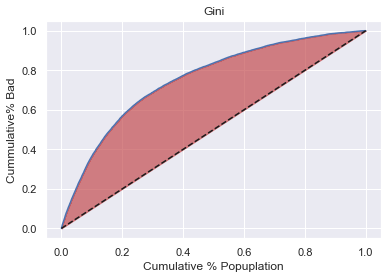

In [34]:
#plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'],linestyle ='--', color = 'k')
plt.fill_between(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'],df_actual_predicted_probs['Cumulative Perc Population'], alpha = 0.7, color = 'r')

plt.xlabel('Cumulative % Popuplation')
plt.ylabel('Cummulative% Bad')
plt.title('Gini')

## (2) Kolmogorov-Smirnov Coefficient
The maxium difference between the cumulative distribution functions shows how the model separates non-default and default borrowers. The **greater** the difference, the better the model.
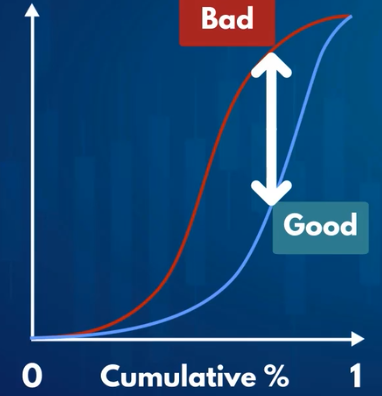

Text(0.5, 1.0, 'Kolmogorov-Simirnov')

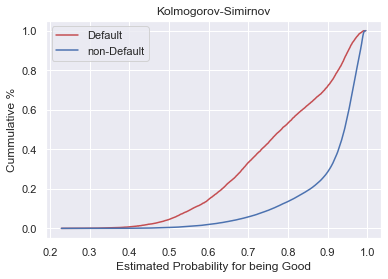

In [35]:
plt.plot(df_actual_predicted_probs['y_hat_testProba'], 
         df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r', label = 'Default')
plt.plot(df_actual_predicted_probs['y_hat_testProba'], 
         df_actual_predicted_probs['Cumulative Perc Good'], color = 'b', label = 'non-Default')

plt.legend(loc = 'upper left')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cummulative %')

plt.title('Kolmogorov-Simirnov')

As we see from the graph, the two cumulative distribution functions are sufficiently far away and hence the model has satisfactory predictive power

In [36]:
#Calculate KS coefficient
max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])

0.4392428564794162

## 6. Save our model

In [37]:
filename = 'PD_model.sav'
pickle.dump(reg,open(filename, 'wb'))